Epoch 1/80


2022-05-26 23:17:55.085879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-26 23:17:58.377423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 - 4s - loss: 1.5076 - accuracy: 0.3420 - val_loss: 1.2351 - val_accuracy: 0.5200 - 4s/epoch - 123ms/step
Epoch 2/80
32/32 - 3s - loss: 1.2068 - accuracy: 0.5268 - val_loss: 0.9457 - val_accuracy: 0.6310 - 3s/epoch - 93ms/step
Epoch 3/80
32/32 - 3s - loss: 1.0707 - accuracy: 0.5863 - val_loss: 0.8094 - val_accuracy: 0.7040 - 3s/epoch - 93ms/step
Epoch 4/80
32/32 - 3s - loss: 0.9201 - accuracy: 0.6398 - val_loss: 0.6736 - val_accuracy: 0.7390 - 3s/epoch - 92ms/step
Epoch 5/80
32/32 - 3s - loss: 0.8131 - accuracy: 0.6950 - val_loss: 0.6720 - val_accuracy: 0.7300 - 3s/epoch - 94ms/step
Epoch 6/80
32/32 - 3s - loss: 0.7263 - accuracy: 0.7163 - val_loss: 0.7595 - val_accuracy: 0.7140 - 3s/epoch - 93ms/step
Epoch 7/80
32/32 - 3s - loss: 0.6710 - accuracy: 0.7450 - val_loss: 0.5994 - val_accuracy: 0.7690 - 3s/epoch - 92ms/step
Epoch 8/80
32/32 - 3s - loss: 0.6066 - accuracy: 0.7705 - val_loss: 0.4903 - val_accuracy: 0.8250 - 3s/epoch - 93ms/step
Epoch 9/80
32/32 - 3s - loss: 0.6012 - acc

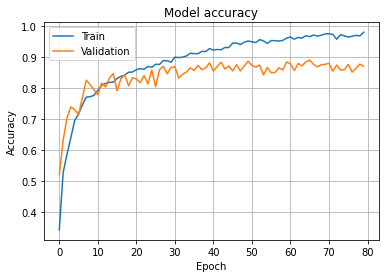

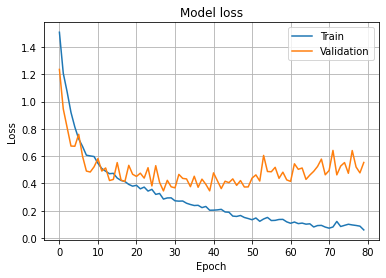

In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# train.csv 파일 읽어오기 (label)
f= open('train.csv','r')
label_data=pd.read_csv(f,header=0)
seq=label_data[['label']].to_numpy()

# 이미지 읽어오기 (data)
images = np.zeros((5000,64,64,3))
for i in range(5000):
    images[i]=image.load_img('train/train_img_{0}.jpg'.format(i))

# 훈련집합과 테스트집합으로 분할
x_train,x_test,y_train,y_test=train_test_split(images,seq,stratify=seq,test_size=0.2)

x_train=x_train.astype(np.float32)/255.0 # 정규화
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,5) # 원핫코드로 변환(레이블은 0,1,2,3,4 총 5개 부류)
y_test=tf.keras.utils.to_categorical(y_test,5)

# 드랍아웃이 없는게 성능이 더 좋음
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dense(5,activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
# 데이터 증대
generator=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
hist=cnn.fit(generator.flow(x_train,y_train,batch_size=128),epochs=80,validation_data=(x_test,y_test),verbose=2)

res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()



In [14]:
cnn.save('final_cnn.h5')

In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd
import openpyxl
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

cnn=tf.keras.models.load_model("final_cnn.h5")
cnn.summary()

f= open('train.csv','r')
label_data=pd.read_csv(f,header=0)
seq=label_data[['label']].to_numpy()

# 이미지 읽어오기 (data)
images = np.zeros((5000,64,64,3))
for i in range(5000):
    images[i]=image.load_img('train/train_img_{0}.jpg'.format(i))

# 훈련집합과 테스트집합으로 분할
x_train,x_test,y_train,y_test=train_test_split(images,seq,stratify=seq,test_size=0.2)

x_train=x_train.astype(np.float32)/255.0 # 정규화
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,5) # 원핫코드로 변환(레이블은 0,1,2,3,4 총 5개 부류)
y_test=tf.keras.utils.to_categorical(y_test,5)

res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

# 테스트 집합 예측 후 엑셀에 output(label) 저장하기
# res = cnn.predict(x_test)
# res_real = np.zeros((1000,1))

# for i in range(1000):
#     for j in range(5):
#         if(max(res[i]) == res[i][j]):
#             res_real[i] = j

# res_real = res_real.astype(np.uint32)

# df = pd.DataFrame(res_real,columns=['label'])
# print(df)

# df.to_excel('final_result.xlsx',sheet_name='label',index=False,header=False)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                    

2022-05-26 17:07:52.788752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


정확률은 93.80000233650208
